###  Directing Customers to Subscription Through App Behavior Analysis

### Goal of the project :

The "FinTech" company launch there android and iOS mobile base app and want to grow there business. But there is problem how to recomended this app and offer who realy want to use it. So for that company desided to give free trial to each and every customer for 24 houre and collect data from the customers. In this senariao some customer purchase the app and someone not. According to this data company want to give special offer to the customer who are not interested to buy without offer and grow thre business.

This is classification problem

Import Libraries:

In [1]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

In [2]:
fineTech_appData = pd.read_csv("FineTech_appData.csv")

In [3]:
fineTech_appData.shape

(50000, 12)

In [4]:
fineTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
fineTech_appData.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [52]:
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv("top_screens.csv").top_screens.values 
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [7]:
# fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str) + ','


In [8]:
# fineTech_appData.head()

In [9]:
# string into to number
 
# for screen_name in fineTech_app_screen_Data:
#     fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
#     fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name+",", "")

def encode(screen,screen_list):
        if screen in screen_list:
            return 1
        else:
            return 0
        
        
for screen in fineTech_app_screen_Data:
    fineTech_appData[screen] = [encode(screen,fineTech_appData.screen_list[i]) for i in range(fineTech_appData.shape[0])]

In [10]:
# Get the unique value of each columns and it's length
features = fineTech_appData.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, fineTech_appData[i].unique(), len(fineTech_appData[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
........................

          
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
........................

          
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52 

In [11]:
fineTech_appData.isnull().sum().sort_values(ascending=False)

enrolled_date            18926
user                         0
AccountView                  0
ProfileEducationMajor        0
Saving7                      0
                         ...  
Credit3                      0
Credit1                      0
EditProfile                  0
Credit2                      0
ListPicker                   0
Length: 70, dtype: int64

In [12]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user                     50000 non-null  int64 
 1   first_open               50000 non-null  object
 2   dayofweek                50000 non-null  int64 
 3   hour                     50000 non-null  object
 4   age                      50000 non-null  int64 
 5   screen_list              50000 non-null  object
 6   numscreens               50000 non-null  int64 
 7   minigame                 50000 non-null  int64 
 8   used_premium_feature     50000 non-null  int64 
 9   enrolled                 50000 non-null  int64 
 10  enrolled_date            31074 non-null  object
 11  liked                    50000 non-null  int64 
 12  Loan2                    50000 non-null  int64 
 13  location                 50000 non-null  int64 
 14  Institutions             50000 non-nul

In [13]:
fineTech_appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000,0.506380,0.517760,...,0.022460,0.029800,0.021160,0.096560,0.014220,0.016180,0.013340,0.013400,0.008200,0.007580
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184,0.499964,0.499689,...,0.148176,0.170037,0.143919,0.295361,0.118398,0.126169,0.114727,0.114981,0.090183,0.086733
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# # Get the unique value of each columns and it's length
# features = fineTech_appData.columns
# for i in features:
#     print("""Unique value of {}\n{}\nlen is {} \n........................\n
#           """.format(i, fineTech_appData[i].unique(), len(fineTech_appData[i].unique())))

In [15]:
fineTech_appData.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', '

In [16]:
# drop object dtype columns
fineTech_appData.drop(['user', 'first_open', 'screen_list', 'enrolled_date','hour'], axis = 1,inplace=True)


In [17]:
fineTech_appData.head(6)       # head of numeric dataFrame 

,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,3,23,15,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6,24,13,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,23,3,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,28,40,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,31,32,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2,20,14,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Data Vizualization

### Heat Map Using Correlation Matrix

In [18]:
fineTech_appData.corr()

,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
dayofweek,1.000000,-0.012326,0.007925,-0.008631,0.001439,0.011326,-0.005737,0.006476,0.003073,0.008830,...,0.001891,-0.000723,0.000849,-0.008870,-0.002347,0.000924,-0.005913,0.002225,0.002484,-0.002306
age,-0.012326,1.000000,-0.128739,0.019745,0.004301,-0.131303,-0.002593,-0.024932,-0.121282,-0.040819,...,-0.013649,0.029590,-0.012637,0.036178,0.024346,-0.012898,-0.026451,0.021619,0.014945,0.027139
numscreens,0.007925,-0.128739,1.000000,0.041154,0.061972,0.209457,-0.007349,0.246302,0.366710,0.310491,...,0.290583,0.110230,0.285608,0.191959,0.071096,0.103227,0.073539,0.102227,0.023007,0.098075
minigame,-0.008631,0.019745,0.041154,1.000000,0.108780,0.104979,-0.012250,-0.028620,-0.026487,0.024194,...,0.021724,-0.029449,0.016545,0.005992,-0.010708,0.040261,-0.017377,0.032394,-0.009443,0.001588
used_premium_feature,0.001439,0.004301,0.061972,0.108780,1.000000,-0.052703,0.001690,0.066739,-0.074160,0.083107,...,-0.003998,-0.025342,-0.002208,0.056068,-0.022070,0.128461,-0.033599,0.106812,-0.009713,0.001103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Loan4,0.000924,-0.012898,0.103227,0.040261,0.128461,0.007263,0.000647,0.032131,0.037159,0.000149,...,-0.011950,-0.010356,-0.013348,0.085273,-0.004691,1.000000,-0.008003,0.033308,-0.006387,0.008897
ResendToken,-0.005913,-0.026451,0.073539,-0.017377,-0.033599,-0.011332,-0.002844,-0.117770,0.088843,-0.074974,...,-0.012919,-0.007050,-0.014673,-0.005551,-0.013965,-0.008003,1.000000,-0.012035,-0.010573,-0.000112
TransactionList,0.002225,0.021619,0.102227,0.032394,0.106812,-0.046045,0.001148,0.038523,-0.030946,0.071133,...,0.008161,0.001058,0.009455,0.059661,-0.006651,0.033308,-0.012035,1.000000,-0.002882,0.017892
NetworkFailure,0.002484,0.014945,0.023007,-0.009443,-0.009713,0.008319,-0.002778,0.022350,-0.001456,0.024639,...,-0.000312,0.036236,0.000500,0.001810,0.000318,-0.006387,-0.010573,-0.002882,1.000000,-0.002833


Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData')

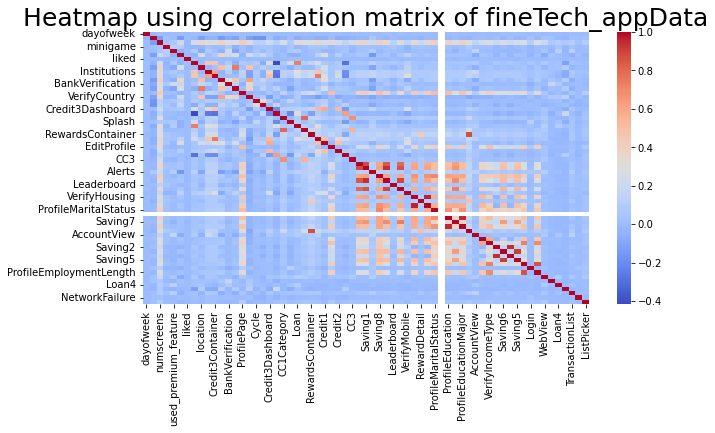

In [19]:
# Heatmap
plt.figure(figsize=(10,5)) # heatmap size in ratio 16:9

sns.heatmap(fineTech_appData.corr(), cmap ='coolwarm') # show heatmap

plt.title("Heatmap using correlation matrix of fineTech_appData", fontsize =25) # title of heatmap 

In [20]:
# Pailplot of fineTech_appData Dataset
#%matplotlib qt5                               # for show graph in seperate window
# sns.pairplot(fineTech_appData,hue="enrolled") 

In [21]:
# Show counterplot of 'enrolled' feature
# sns.countplot(fineTech_appData.enrolled)

In [22]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (fineTech_appData.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(fineTech_appData.enrolled < 1).sum(),  "out of 50000")

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


### Histogram of each feature of fineTech_appData 

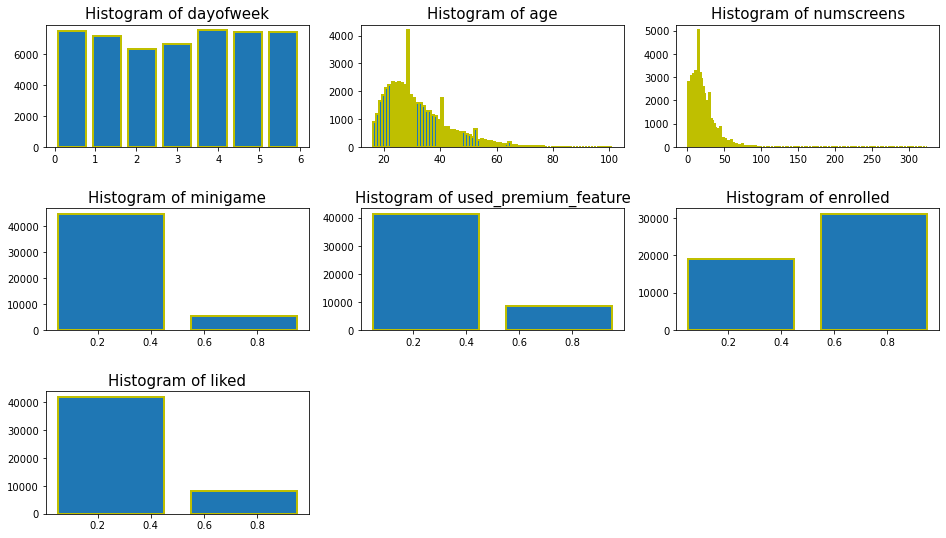

In [23]:
# plot histogram 

plt.figure(figsize = (16,9))                           # figure size in ratio 16:9
features = fineTech_appData.columns                      # list of columns name
for i,j in enumerate(features):
    if i <7:
        plt.subplot(3,3,i+1)                                    # create subplot for histogram
        plt.title("Histogram of {}".format(j), fontsize = 15)              # title of histogram

        bins = len(fineTech_appData[j].unique())                                # bins for histogram
        plt.hist(fineTech_appData[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2 ) # plot histogram

plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots) 


## Data Preprocessing

### Split dataset in Train and Test

In [24]:
clean_fineTech_appData = fineTech_appData
target = fineTech_appData['enrolled'] 
fineTech_appData.drop(columns = 'enrolled', inplace = True)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData, target, test_size = 0.2, random_state = 0)

In [26]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 64)
Shape of X_test =  (10000, 64)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [27]:
# take User ID in another variable 
# train_userID = X_train['user']
# X_train.drop(columns= 'user', inplace =True)
# test_userID = X_test['user']
# X_test.drop(columns= 'user', inplace =True)

In [28]:
# print('Shape of X_train = ', X_train.shape)
# print('Shape of X_test = ', X_test.shape)
# print('Shape of train_userID = ', train_userID.shape)
# print('Shape of test_userID = ', test_userID.shape)


## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Model Building

In [30]:
# impoer requiede packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decision Tree

In [31]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_score(y_test, y_pred_dt)

0.6968

In [32]:
# train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_dt_sc)

0.6966

## K-NN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_score(y_test, y_pred_knn)

0.6934

In [34]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_knn_sc)

0.7294

## Naive Bayes

In [35]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_score(y_test, y_pred_nb)

0.6385

In [36]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_nb_sc)

0.6385

## Random Forest

In [37]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.742

In [38]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_rf_sc)

0.7429

## Logistic Regression

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_score(y_test, y_pred_lr)

C:\Users\khair\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7438

In [40]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_lr_sc)

0.7438

## Support Vector Machine

In [41]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

accuracy_score(y_test, y_pred_svc)

0.7277

In [42]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_svc_sc)

0.7597

In [ ]:
pip install --upgrade pip

## XGBoost

In [43]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7714

In [44]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc)

0.7714

In [45]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)

accuracy_score(y_test, y_pred_xgb_pt1)

0.7741

In [46]:
# XGB classifier with parameter tuning
# train with Standert Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)

accuracy_score(y_test, y_pred_xgb_sc_pt2)

0.7739

Text(0.5, 1.0, 'Confussion Matrix')

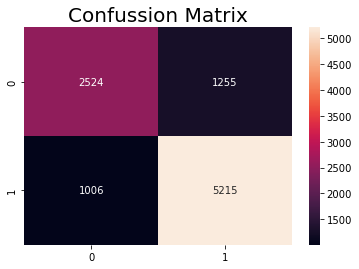

In [47]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)  

In [48]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)

print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.72      0.67      0.69      3779
           1       0.81      0.84      0.82      6221

    accuracy                           0.77     10000
   macro avg       0.76      0.75      0.76     10000
weighted avg       0.77      0.77      0.77     10000

